# 3_10_animations

Output;

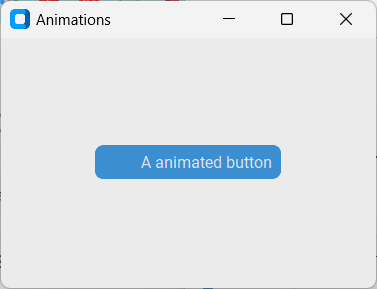 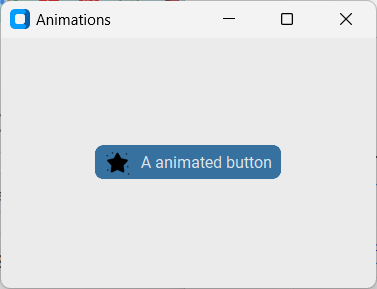

In [2]:
import customtkinter as ctk
from PIL import Image
from os import walk

# exercise:
# create an animation that runs forever

class AnimatedButton(ctk.CTkButton):
	def __init__(self, parent, light_path, dark_path):
		
		# animation logic setup
		self.frames = self.import_folders(light_path, dark_path)
		self.frame_index = 0
		self.animation_length = len(self.frames) - 1
		self.animation_status = ctk.StringVar(value = 'start')

		self.animation_status.trace('w', self.animate)

		super().__init__(
			master = parent, 
			text = 'A animated button', 
			image = self.frames[self.frame_index],
			command = self.infinite_animate)
		self.pack(expand = True)

	def infinite_animate(self):
		self.frame_index += 1
		self.frame_index = 0 if self.frame_index > self.animation_length else self.frame_index
		self.configure(image = self.frames[self.frame_index])
		self.after(20, self.infinite_animate)

	def import_folders(self, light_path, dark_path):
		image_paths = []
		for path in (light_path, dark_path):
			for _, __, image_data in walk(path):
				sorted_data = sorted(
					image_data, 
					key = lambda item: int(item.split('.')[0][-5:]))
				
				full_path_data = [path + '/' + item for item in sorted_data]
				image_paths.append(full_path_data)
		image_paths = zip(*image_paths)

		ctk_images = []
		for image_path in image_paths:
			ctk_image = ctk.CTkImage(
				light_image = Image.open(image_path[0]), 
				dark_image = Image.open(image_path[1]))
			ctk_images.append(ctk_image)

		return ctk_images

	def trigger_animation(self):
		if self.animation_status.get() == 'start':
			self.frame_index = 0
			self.animation_status.set('forward')
		if self.animation_status.get() == 'end':
			self.frame_index = self.animation_length
			self.animation_status.set('backward')

	def animate(self, *args):
		if self.animation_status.get() == 'forward':
			self.frame_index += 1
			self.configure(image = self.frames[self.frame_index])

			if self.frame_index < self.animation_length:
				self.after(20, self.animate)
			else:
				self.animation_status.set('end')

		if self.animation_status.get() == 'backward':
			self.frame_index -= 1
			self.configure(image = self.frames[self.frame_index])

			if self.frame_index > 0:
				self.after(20, self.animate)
			else:
				self.animation_status.set('start')

# window 
window = ctk.CTk()
window.title('Animations')
window.geometry('300x200')
# ctk.set_appearance_mode('light')

AnimatedButton(window, 'black', 'yellow')

# run
window.mainloop()